<a href="https://colab.research.google.com/github/sayid-alt/olist-store-analysis-project/blob/main/Brazilian_E_Commerce_Public_Dataset_by_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Sayid Muhammad Heykal]
- **Email:** [heykalsayid@gmail.com]
- **ID Dicoding:** [heykalsayid]

## Menentukan Pertanyaan Bisnis

- How have the sales fluctuated over the last few years?
- What was the most sold product last year?
- Where are most customers ordering the product?
- How RFM analysis?

## Import Semua Packages/Library yang Digunakan

In [1863]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from zipfile import ZipFile
import os

## Data Wrangling

### Gathering Data

#### Download and retrieve data from github

In [1864]:
# Download raw file from github

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/sayid-alt/olist-store-analysis-project/main/'
DATASET_PATH = os.path.join('datasets')
DATASET_URL = DOWNLOAD_ROOT + 'datasets/olist-datasets.zip'

def fetch_olist_datasets(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
  os.makedirs(dataset_path, exist_ok=True)
  zip_path = os.path.join(dataset_path, 'olist-datasets.zip')
  urllib.request.urlretrieve(dataset_url, zip_path)
  with ZipFile(zip_path) as zObject:
    zObject.extractall(path=dataset_path)
    zObject.close()

fetch_olist_datasets()

#### Load olist dataset

In [1865]:
# function for loading an olist datasets
# return pandas datafram

def load_olist_dataset(csv_name):
  olist_path = os.path.join('datasets', 'olist-datasets')
  csv_file = olist_path + '/' + csv_name
  return pd.read_csv(csv_file)

#### customers_df

In [1866]:
customers_df = load_olist_dataset('olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### products_df

In [1867]:
products_df = load_olist_dataset('olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### product_name_translation_df

In [1868]:
product_name_translation_df = load_olist_dataset('product_category_name_translation.csv')
product_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### orders_df

In [1869]:
orders_df = load_olist_dataset('olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### order_items_df

In [1870]:
order_items_df = load_olist_dataset('olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

#### assessing - customers_df

In [1871]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [1872]:
# drop custoemr_unique_id column
customers_df.drop(columns=['customer_unique_id'], inplace=True)

In [1873]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [1874]:
customers_df.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [1875]:
customers_df.duplicated().sum()

0

#### assessing - products_df

In [1876]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1877]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [1878]:
products_df.duplicated().sum()

0

In [1879]:
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


#### assessing - Products_name_trnslation_df

In [1880]:
product_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [1881]:
product_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [1882]:
product_name_translation_df.duplicated().sum()

0

#### assessing - orders_df

In [1883]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [1884]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [1885]:
orders_df.duplicated().sum()

0

#### assessing - order_items_df

In [1886]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [1887]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [1888]:
order_items_df.duplicated().sum()

0

### Cleaning Data

#### cleaning - product_df

In [1889]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1890]:
# Rename typo columns name
products_df.rename(columns={
    'product_name_lenght' : 'product_name_length',
    'product_description_lenght' : 'product_description_length'
}, inplace=True)

In [1891]:
# re-check renamed columns
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1892]:
# imputing missing value with unknown instead of deleting the intire columns
products_df['product_category_name'].fillna('unknown', inplace=True)

# Imputing missing value of numerical columns data with 0
numerical_columns = ['product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in numerical_columns:
  products_df[col].fillna(0, inplace=True)


In [1893]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### cleaning - orders_df

In [1894]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [1895]:
# change format date
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [1896]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [1897]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [1898]:
# look up the null value of order_approved_at column
orders_df[orders_df['order_approved_at'].isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


In [1899]:
# look up the value counts of order_status column respected to the misisng value of order_approved_at column
orders_df[orders_df['order_approved_at'].isna()]['order_status'].value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

In [1900]:
# print all status order
orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [1901]:
# drop all rows that does not contains value delivered, because we just want the column that informs us delivered product
orders_df = orders_df[orders_df['order_status'].str.contains('delivered') == True]

In [1902]:
orders_df['order_status'].value_counts() # now it's left column that contains delivered status, it reduces the number of missing values

delivered    96478
Name: order_status, dtype: int64

In [1903]:
orders_df.isna().sum() # now it lefts missing value with delivered status

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [1904]:
orders_df[orders_df['order_approved_at'].isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20


In [1905]:
# count the median value of the gap of order_purchase_timestamp and order_approved_at,
# then the median value will imputed to the order_apporved_at with calculation (order_puchase_timestamp + median gap)
import statistics
median_approved_time = statistics.median(
    orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
)

orders_df['order_approved_at'].fillna(
    orders_df['order_purchase_timestamp'] + median_approved_time, inplace=True
)

In [1906]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    8
order_estimated_delivery_date    0
dtype: int64

In [1907]:
orders_df[orders_df['order_delivered_carrier_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


In [1908]:
# calculate the median value gap between estimated delivery and delivered customer
median_estimated_gap_time = statistics.median(orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date'])


# now subtract estimated value with median_estimated_gap,
# and impute it to order_delivered_customer_date column
orders_df['order_delivered_customer_date'].fillna(
    orders_df['order_estimated_delivery_date'] - median_estimated_gap_time,
    inplace=True
)

In [1909]:
# calculate median of sum of delivered gap time
median_delivered_time = statistics.median(orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date'])

# impute the median of gap time value to the missing value in column order_delivered_carrier_date
# by calculating (order_delivered_custoemr_date - median_delivered_time)
orders_df['order_delivered_carrier_date'].fillna(
    orders_df['order_delivered_customer_date'] - median_delivered_time,
    inplace=True
)

# and for missing value in order_delivered_customer_date
# also impute by the same median value calculated by (order_delivered_carrier_date + median_delivered_time)
orders_df['order_delivered_customer_date'].fillna(
    orders_df['order_delivered_carrier_date'] + median_delivered_time,
    inplace=True
)

In [1910]:
orders_df.isna().sum() # all clean

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### cleaning - orders_item_df

In [1911]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [1912]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [1913]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [1914]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [1915]:
order_items_df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

### Explore - cutomers_df

In [1916]:
customers_df.describe(include='all')

,customer_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441.000000,99441,99441
unique,99441,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,NaN,sao paulo,SP
freq,1,NaN,15540,41746
mean,NaN,35137.474583,NaN,NaN
std,NaN,29797.938996,NaN,NaN
min,NaN,1003.000000,NaN,NaN
25%,NaN,11347.000000,NaN,NaN
50%,NaN,24416.000000,NaN,NaN
75%,NaN,58900.000000,NaN,NaN


In [1917]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [1918]:
customers_df['customer_city'].value_counts().sort_values(ascending=False).head()

sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_city, dtype: int64

In [1919]:
customers_df['customer_city'].value_counts().sort_values(ascending=False).tail()

palmares paulista    1
pires ferreira       1
vicente dutra        1
alagoa nova          1
eugenio de castro    1
Name: customer_city, dtype: int64

In [1920]:
customers_df['customer_state'].value_counts().sort_values(ascending=False).head()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_state, dtype: int64

In [1921]:
customers_df['customer_state'].value_counts().sort_values(ascending=False).tail()

RO    253
AM    148
AC     81
AP     68
RR     46
Name: customer_state, dtype: int64

### Explore - products_df

In [1922]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  float64
 3   product_description_length  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1923]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.579527,757.213104,2.148463,2276.334315,30.813207,16.936633,23.195320
std,NaN,NaN,12.071951,637.745057,1.745732,4281.945502,16.915648,13.637779,12.080033
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [1924]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### explore - product_name_translation_df

In [1925]:
product_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [1926]:
product_name_translation_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [1927]:
product_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


##### create products_translated_df

In [1928]:
# merge products dataframe with product_name_translation dataframe
# this merge aimed for give the translation of category name brazilian with english

products_translated_df = pd.merge(
    left=products_df,
    right=product_name_translation_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [1929]:
products_translated_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


### explore - orders_df & order_items_df

In [1930]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96478 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96478 non-null  datetime64[ns]
 6   order_delivered_customer_date  96478 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [1931]:
orders_df.describe(include='all')

<ipython-input-1931-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-1931-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-1931-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-1931-caf441259110>:1: Fut

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96478,96478,96478,96478,96478,96478,96478,96478
unique,96478,96478,1,95956,88288,80108,95665,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-11-20 10:59:08,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [1932]:
# calculate total delivery time in days
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x : x.total_seconds())
orders_df['delivery_time'] = round(delivery_time/84000) # divide by 84000 which total second in days

In [1933]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,9.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,10.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,14.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [1934]:
print('delivery time average:', round(orders_df['delivery_time'].mean()), 'days') # count average of total delivery

delivery time average: 13 days


In [1935]:
# create column contains purchase time with format yyyy-mm
orders_df['purchase_year'] = orders_df['order_purchase_timestamp'].apply(lambda x : x.strftime('%Y'))
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].apply(lambda x : x.strftime('%B'))
orders_df['purchase_year_month'] = orders_df['order_purchase_timestamp'].apply(lambda x : x.strftime('%Y-%m'))

In [1936]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,purchase_year,purchase_month,purchase_year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,9.0,2017,October,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,2018,July,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,10.0,2018,August,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,14.0,2017,November,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2018,February,2018-02


##### create order_customers_df

In [1937]:
# merge orders_df with customers_df
order_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

In [1938]:
order_customers_df = pd.merge(
    left=order_customers_df,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [1939]:
order_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,purchase_year,...,purchase_year_month,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,9.0,2017,...,2017-10,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,2018,...,2018-07,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,10.0,2018,...,2018-08,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,14.0,2017,...,2017-11,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2018,...,2018-02,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [1940]:
# total number of orders in spesific year and month
order_customers_df.groupby(by=['purchase_year', 'purchase_month'],  as_index=False).agg({
    'order_id' : 'nunique',
    'price' : 'sum'
})

,purchase_year,purchase_month,order_id,price
0,2016,December,1,10.90
1,2016,October,265,40325.11
2,2016,September,1,134.97
3,2017,April,2303,340669.68
4,2017,August,4193,554699.70
5,2017,December,5513,726033.19
6,2017,February,1653,234223.40
7,2017,January,750,111798.36
8,2017,July,3872,481604.52
9,2017,June,3135,421923.37


In [1941]:
# total number of orders in spesific month
order_customers_df.groupby(by=['purchase_month'],  as_index=False).agg({
    'order_id' : 'nunique',
    'price' : 'sum'
}).sort_values(by='order_id', ascending=False)

,purchase_month,order_id,price
1,August,10544,1393276.34
8,May,10295,1466882.94
5,July,10031,1349557.98
7,March,9549,1312555.10
6,June,9234,1278001.23
0,April,9101,1314203.77
3,February,8208,1060660.53
4,January,7819,1036443.36
9,November,7289,987765.37
2,December,5514,726044.09


In [1942]:
# total number of orders in spesific year
order_customers_df.groupby(by=['purchase_year'],  as_index=False).agg({
    'order_id' : 'nunique',
    'price' : 'sum'
}).sort_values(by='order_id', ascending=False)

,purchase_year,order_id,price
2,2018,52783,7218125.12
1,2017,43428,5962902.01
0,2016,267,40470.98


In [1943]:
# top total number of orders in spesific city
order_customers_df.groupby(by=['customer_city'],  as_index=False).agg({
    'order_id' : 'nunique',
    'price' : 'sum'
}).sort_values(by='order_id', ascending=False)

,customer_city,order_id,price
3563,sao paulo,15045,1859556.83
3126,rio de janeiro,6601,955573.97
449,belo horizonte,2697,346039.04
553,brasilia,2071,295814.72
1135,curitiba,1489,205999.33
...,...,...,...
2924,populina,1,47.60
2923,ponto novo,1,360.00
2921,ponto do marambaia,1,13.70
2920,ponto belo,1,79.90


In [1944]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [1945]:
order_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,purchase_year,...,purchase_year_month,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,9.0,2017,...,2017-10,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,2018,...,2018-07,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,10.0,2018,...,2018-08,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,14.0,2017,...,2017-11,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2018,...,2018-02,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


### explore products_df

In [1946]:
products_df = products_translated_df

In [1947]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [1948]:
products_df.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,47.579527,757.213104,2.148463,2276.334315,30.813207,16.936633,23.195320
std,12.071951,637.745057,1.745732,4281.945502,16.915648,13.637779,12.080033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [1949]:
# identify weight of product (< 1000 g is small unit, > 1000 g is large unit)
products_df['weight_type'] = products_df['product_weight_g'].apply(lambda x : 'Small' if x < 1000 else 'Large')

In [1950]:
products_df.sample(10)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,weight_type
31428,75baeeacdb53150ac063abf52e4acaa7,malas_acessorios,33.0,503.0,9.0,250.0,23.0,26.0,15.0,luggage_accessories,Small
20615,e3991d2e1045bf9b4f3474f50d5df842,livros_tecnicos,51.0,593.0,1.0,750.0,31.0,3.0,27.0,books_technical,Small
1692,328e385961fd439024dabd6512dc1039,automotivo,47.0,641.0,4.0,5200.0,44.0,17.0,30.0,auto,Large
24152,b9976e9c22fb1540bd71d1bcd2989475,artes_e_artesanato,60.0,1611.0,7.0,2550.0,46.0,16.0,25.0,arts_and_craftmanship,Large
19099,f2bcc887769f563eb4f126389e64715a,cama_mesa_banho,40.0,207.0,1.0,700.0,35.0,7.0,27.0,bed_bath_table,Small
19243,c8fade3c4ba064e104828c4ad4461178,cama_mesa_banho,52.0,289.0,1.0,3850.0,40.0,12.0,38.0,bed_bath_table,Large
28895,e17e3bca5027b6a1ecb3455d503f4517,bebes,55.0,332.0,2.0,200.0,30.0,4.0,20.0,baby,Small
17982,30a47cc354b9607076272300c899dce9,bebes,26.0,1594.0,5.0,450.0,26.0,7.0,22.0,baby,Small
4672,aa21b6a3f4c75c7a9ae8d9ba32796914,cama_mesa_banho,53.0,413.0,1.0,2250.0,42.0,16.0,36.0,bed_bath_table,Large
19292,a3cdb889819a08cb9f6a68de568329e5,consoles_games,43.0,846.0,9.0,1000.0,20.0,30.0,20.0,consoles_games,Large


In [1951]:
# quantity of large and small product
products_df.groupby('weight_type').product_id.nunique()

weight_type
Large    13400
Small    19551
Name: product_id, dtype: int64

In [1952]:
# number of total sold products
products_df['product_category_name_english'].value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: product_category_name_english, Length: 71, dtype: int64

#### create all_df

In [1953]:
all_df = pd.merge(
    left=order_customers_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

In [1954]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,purchase_year,...,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,weight_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,9.0,2017,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,Small
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,2018,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,Small
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,10.0,2018,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,Small
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,14.0,2017,...,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,Small
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2018,...,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,Small


In [1955]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   customer_id                    110197 non-null  object        
 2   order_status                   110197 non-null  object        
 3   order_purchase_timestamp       110197 non-null  datetime64[ns]
 4   order_approved_at              110197 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110197 non-null  datetime64[ns]
 6   order_delivered_customer_date  110197 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110197 non-null  datetime64[ns]
 8   delivery_time                  110197 non-null  float64       
 9   purchase_year                  110197 non-null  object        
 10  purchase_month                 110197 non-null  object        
 11  

In [1956]:
# most sold products
all_df.groupby(by=['product_category_name_english',]).agg({
    'order_id' : 'nunique',
    'price' : 'sum'
}).sort_values(by='order_id', ascending=False)

,order_id,price
product_category_name_english,,
bed_bath_table,9272,1023434.76
health_beauty,8647,1233131.72
sports_leisure,7530,954852.55
computers_accessories,6530,888724.61
furniture_decor,6307,711927.69
...,...,...
arts_and_craftmanship,23,1814.01
la_cuisine,13,2054.99
cds_dvds_musicals,12,730.00


In [1957]:
# most sold products every years
all_df.groupby(by=['purchase_year', 'product_category_name_english']).agg({
    'order_id': ['nunique'],
    'price' : 'sum'
})

order_id      price
                                             nunique        sum
purchase_year product_category_name_english                    
2016          air_conditioning                     4    1349.29
              audio                                2     156.99
              auto                                 8    1128.26
              baby                                 9    1371.17
              bed_bath_table                       5     478.99
...                                              ...        ...
2018          stationery                        1367  132315.75
              tablets_printing_image              20    1267.96
              telephony                         2117  174123.68
              toys                              1378  168123.27
              watches_gifts                     3418  687855.20

[170 rows x 2 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: How have the sales fluctuated over the last few years?

In [1958]:
monthly_orders_df = all_df.groupby(by='purchase_year_month', as_index=False).agg({
    'order_id' : "nunique",
    'price' : 'sum'
})

In [1959]:
monthly_orders_df.rename(columns={
    'purchase_year_month' : 'time',
    'order_id' : 'order_count',
    'price' : 'revenue'
},inplace=True)

In [1960]:
monthly_orders_df

,time,order_count,revenue
0,2016-09,1,134.97
1,2016-10,265,40325.11
2,2016-12,1,10.90
3,2017-01,750,111798.36
4,2017-02,1653,234223.40
5,2017-03,2546,359198.85
6,2017-04,2303,340669.68
7,2017-05,3546,489338.25
8,2017-06,3135,421923.37
9,2017-07,3872,481604.52


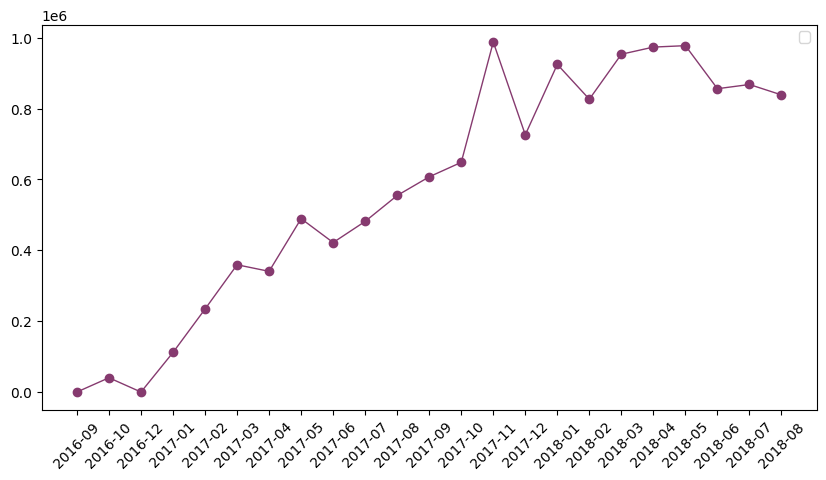

In [1961]:
# Show graph of monthly order
plt.figure(figsize=(10,5))
plt.plot(monthly_orders_df['time'], monthly_orders_df['revenue'], marker='o', linewidth=1, color='#863A6F')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Pertanyaan 2: What was the most sold product last year?

In [1962]:
orders_2018 = all_df[all_df['purchase_year'] == '2018'] # retreive all orders in 2018
most_orders_2018 = orders_2018['product_category_name_english'].value_counts().reset_index() # filter the most sold orders in 2018

In [1963]:
most_orders_2018.rename(columns={
    'index' : 'product_category',
    'product_category_name_english' : 'product_count'
}, inplace=True)

In [1964]:
most_orders_2018.sort_values(by='product_count', ascending=False)

,product_category,product_count
0,health_beauty,5841
1,bed_bath_table,5810
2,computers_accessories,4622
3,sports_leisure,4436
4,furniture_decor,4051
...,...,...
65,home_comfort_2,10
66,fashion_sport,5
67,la_cuisine,4
68,fashion_childrens_clothes,3


<ipython-input-1965-7054e8117da7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-1965-7054e8117da7>:5: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  sns.barplot(
<ipython-input-1965-7054e8117da7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-1965-7054e8117da7>:16: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  sns.barplot(


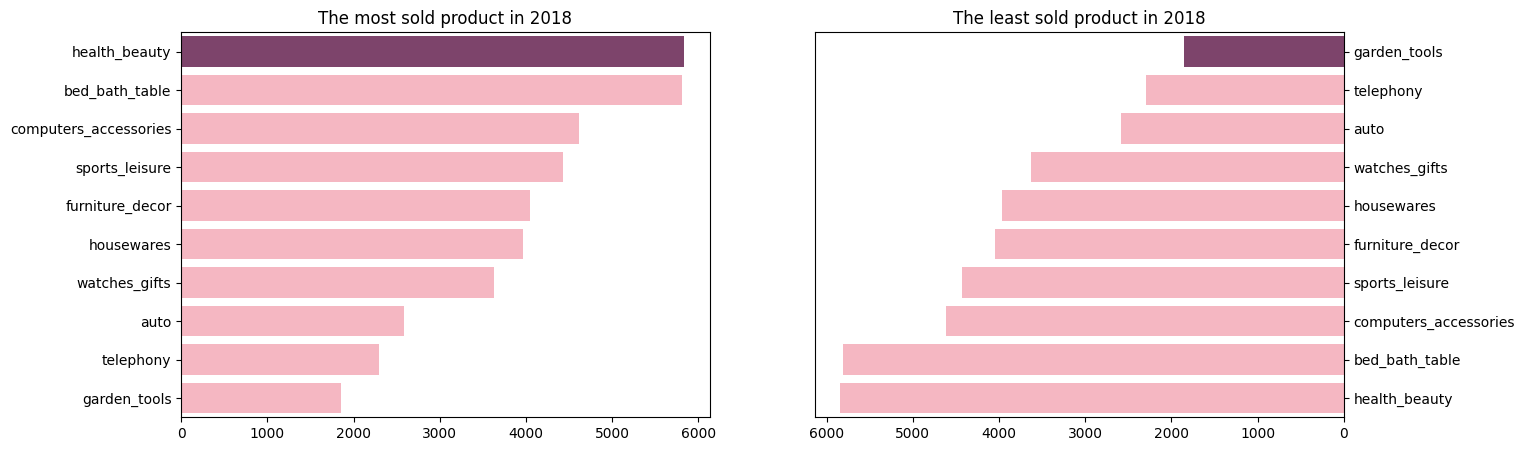

In [1965]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

colors = ['#863A6F','#FFADBC','#FFADBC','#FFADBC','#FFADBC','#FFADBC','#FFADBC','#FFADBC','#FFADBC','#FFADBC','#FFADBC']

sns.barplot(
    data=most_orders_2018.sort_values(by='product_count',ascending=False).head(10),
    y='product_category', x='product_count',
    palette=colors,
    ax=ax[0]
)

ax[0].set_title('The most sold product in 2018')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

sns.barplot(
    data=most_orders_2018.sort_values(by='product_count',ascending=True).tail(10),
    y='product_category', x='product_count',
    palette=colors,
    ax=ax[1]
)

ax[1].set_title('The least sold product in 2018')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].yaxis.set_label_position('right') # set label y axis to the right

# invert xaxis direction
ax[1].invert_xaxis()

# set yaxis label to the right side
ax[1].yaxis.tick_right()


### Pertanyaan 3: Where are most customers ordering the product?

In [1966]:
order_bycity = all_df.groupby(by='customer_city').agg({
    'order_id' : 'nunique',
    'price' : 'sum'
}).sort_values(by='order_id',ascending=False).reset_index()


In [1967]:
order_bycity.rename(columns={
    'customer_city' : 'city',
    'order_id' : 'order_count',
    'price' : 'revenue'
}, inplace=True)

In [1968]:
order_bycity

,city,order_count,revenue
0,sao paulo,15045,1859556.83
1,rio de janeiro,6601,955573.97
2,belo horizonte,2697,346039.04
3,brasilia,2071,295814.72
4,curitiba,1489,205999.33
...,...,...,...
4080,populina,1,47.60
4081,ponto novo,1,360.00
4082,ponto do marambaia,1,13.70
4083,ponto belo,1,79.90


<ipython-input-1969-81fc023c2270>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-1969-81fc023c2270>:4: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  sns.barplot(


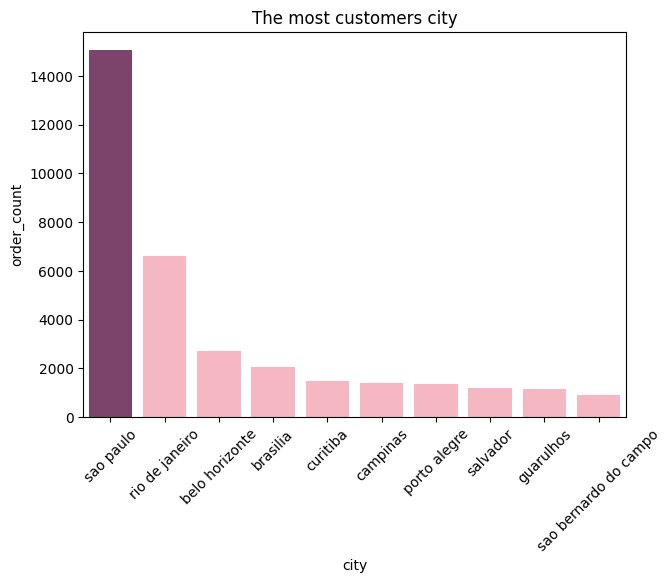

In [1969]:
colors = ['#863A6F','#FFADBC','#FFADBC','#FFADBC','#FFADBC', '#FFADBC','#FFADBC','#FFADBC','#FFADBC','#FFADBC','#FFADBC']

plt.figure(figsize=(7,5))
sns.barplot(
    data = order_bycity.sort_values(by='order_count', ascending=False).head(10),
    x='city', y = 'order_count',
    palette=colors
)

plt.title('The most customers city')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 4 : How RFM analysis?

In [1979]:
# grouping a columns contain customer_id, max order time, frequency
rfm_df = all_df.groupby('customer_id', as_index=False).agg({
    'order_purchase_timestamp' : 'max',
    'order_id' : 'nunique',
    'price' : 'sum'
})

In [1980]:
# rename columns of rfm
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          96478 non-null  object        
 1   max_order_timestamp  96478 non-null  datetime64[ns]
 2   frequency            96478 non-null  int64         
 3   monetary             96478 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.9+ MB


In [1972]:
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [1981]:
# initializing a recent date value from order time
recent_date = orders_df['order_purchase_timestamp'].dt.date.max()
recent_date

datetime.date(2018, 8, 29)

In [1974]:
# format date
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          96478 non-null  object 
 1   max_order_timestamp  96478 non-null  object 
 2   frequency            96478 non-null  int64  
 3   monetary             96478 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ MB


In [1975]:
# calculate recent date of customer order
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x : (recent_date - x).days)

In [1978]:
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,288
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,149


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2